# EDA on Financial Services

## Aim: 
- To give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of business analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Problem: 
- The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.
- Our objective is to provide a complete analysis of the behaviour of the customers and understand who or which category/background people having what attributes has more defaulters

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
app_data = pd.read_csv("D:/Board Infinity/Projects/Final Projects BI/EDA on Financial services/application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Exploration

In [3]:
app_data.shape

(307511, 122)

In [4]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## Feature Selection

In [8]:
null_data = pd.DataFrame(app_data.isnull().sum().sort_values()).reset_index()
null_data.rename(columns={'index': 'Column_name', 0: 'nulls'}, inplace=True)
null_data

,Column_name,nulls
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0
5,REG_CITY_NOT_WORK_CITY,0
6,LIVE_CITY_NOT_WORK_CITY,0
7,ORGANIZATION_TYPE,0
8,FLAG_DOCUMENT_21,0
9,FLAG_DOCUMENT_20,0


In [9]:
null_data['null_%'] = null_data['nulls']/app_data.shape[0]*100
null_data.head()

,Column_name,nulls,null_%
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [10]:
rmv_cols = null_data[null_data['null_%']>=35]['Column_name'].to_list()
dropped_cols = app_data.drop(labels=rmv_cols, axis=1)
dropped_cols.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
flagged_col = []
for i in dropped_cols.columns:
    if i.startswith("FLAG"):
        flagged_col.append(i)
flagged_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

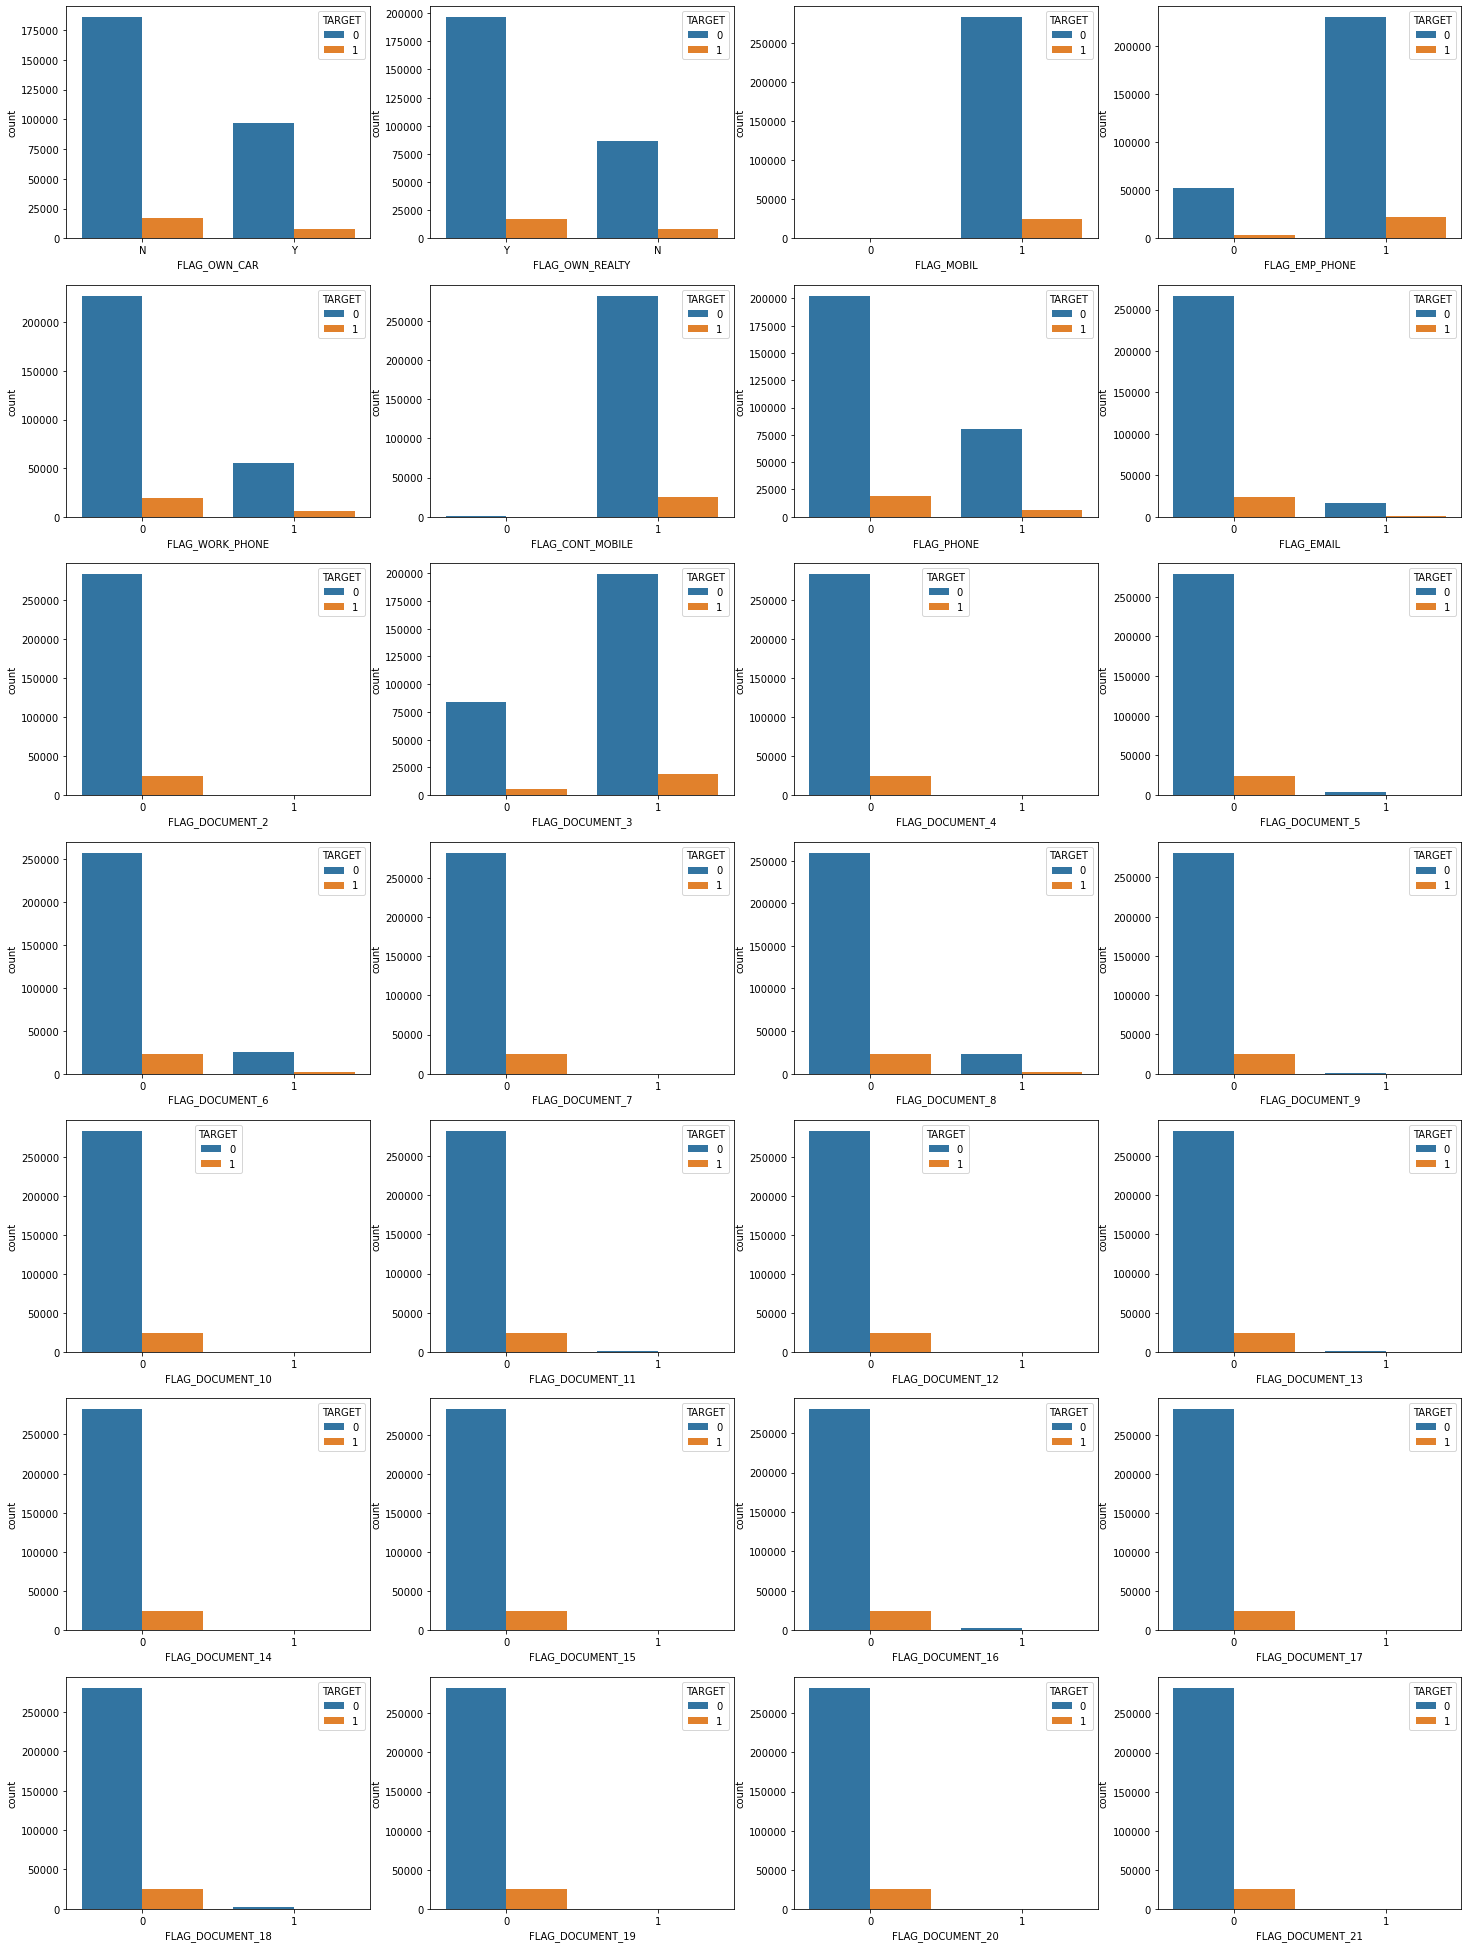

In [12]:
flag_rltn = dropped_cols[flagged_col+['TARGET']]

plt.figure(figsize=(25,35))

for i,j in enumerate(flagged_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data= flag_rltn,x=j,hue='TARGET')

In [13]:
flag_rltn['FLAG_OWN_CAR'] = flag_rltn['FLAG_OWN_CAR'].replace({'N':0, 'Y':1})
flag_rltn['FLAG_OWN_REALTY'] = flag_rltn['FLAG_OWN_REALTY'].replace({'N':0, 'Y':1})

In [14]:
flag_corr = round(flag_rltn.corr(),2)
flag_corr

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
FLAG_OWN_CAR,1.00,-0.00,-0.00,0.15,0.01,-0.01,-0.01,0.03,-0.00,-0.07,-0.00,-0.01,-0.11,0.00,0.23,-0.01,0.00,-0.00,0.0,0.08,0.00,0.05,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.02
FLAG_OWN_REALTY,-0.00,1.00,-0.00,-0.07,-0.11,0.01,-0.04,0.03,0.00,-0.04,0.00,-0.01,0.04,0.00,-0.04,-0.00,0.00,-0.04,-0.0,-0.06,-0.05,-0.04,-0.09,-0.01,-0.09,-0.02,-0.03,-0.00,-0.01
FLAG_MOBIL,-0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,0.15,-0.07,-0.00,1.00,0.23,-0.01,-0.02,0.06,0.00,0.25,-0.00,0.02,-0.60,0.00,0.12,0.02,0.00,0.03,0.0,0.03,0.02,0.01,0.04,0.01,0.04,0.01,0.01,0.01,0.05
FLAG_WORK_PHONE,0.01,-0.11,0.00,0.23,1.00,0.02,0.29,-0.01,-0.00,0.06,-0.00,0.04,-0.14,0.00,0.02,0.01,0.00,0.12,-0.0,0.00,-0.00,0.01,0.01,0.00,0.03,0.01,0.00,0.00,0.03
FLAG_CONT_MOBILE,-0.01,0.01,-0.00,-0.01,0.02,1.00,0.01,-0.01,0.00,0.01,0.00,0.01,0.01,-0.00,-0.02,-0.01,0.00,0.00,0.0,-0.06,-0.07,-0.01,-0.03,-0.01,-0.04,-0.01,0.00,-0.02,0.00
FLAG_PHONE,-0.01,-0.04,0.00,-0.02,0.29,0.01,1.00,0.01,-0.00,-0.01,0.00,0.08,0.01,0.01,0.00,0.01,0.00,0.00,-0.0,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,-0.02
FLAG_EMAIL,0.03,0.03,0.00,0.06,-0.01,-0.01,0.01,1.00,0.00,0.01,0.00,0.00,-0.04,0.00,0.03,0.01,0.00,-0.00,-0.0,-0.00,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00
FLAG_DOCUMENT_2,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,1.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01
FLAG_DOCUMENT_3,-0.07,-0.04,0.00,0.25,0.06,0.01,-0.01,0.01,-0.01,1.00,-0.01,-0.19,-0.49,-0.02,-0.47,-0.10,-0.01,-0.09,-0.0,-0.02,0.00,0.00,0.03,0.00,0.01,0.01,0.01,-0.03,0.04


<AxesSubplot:>

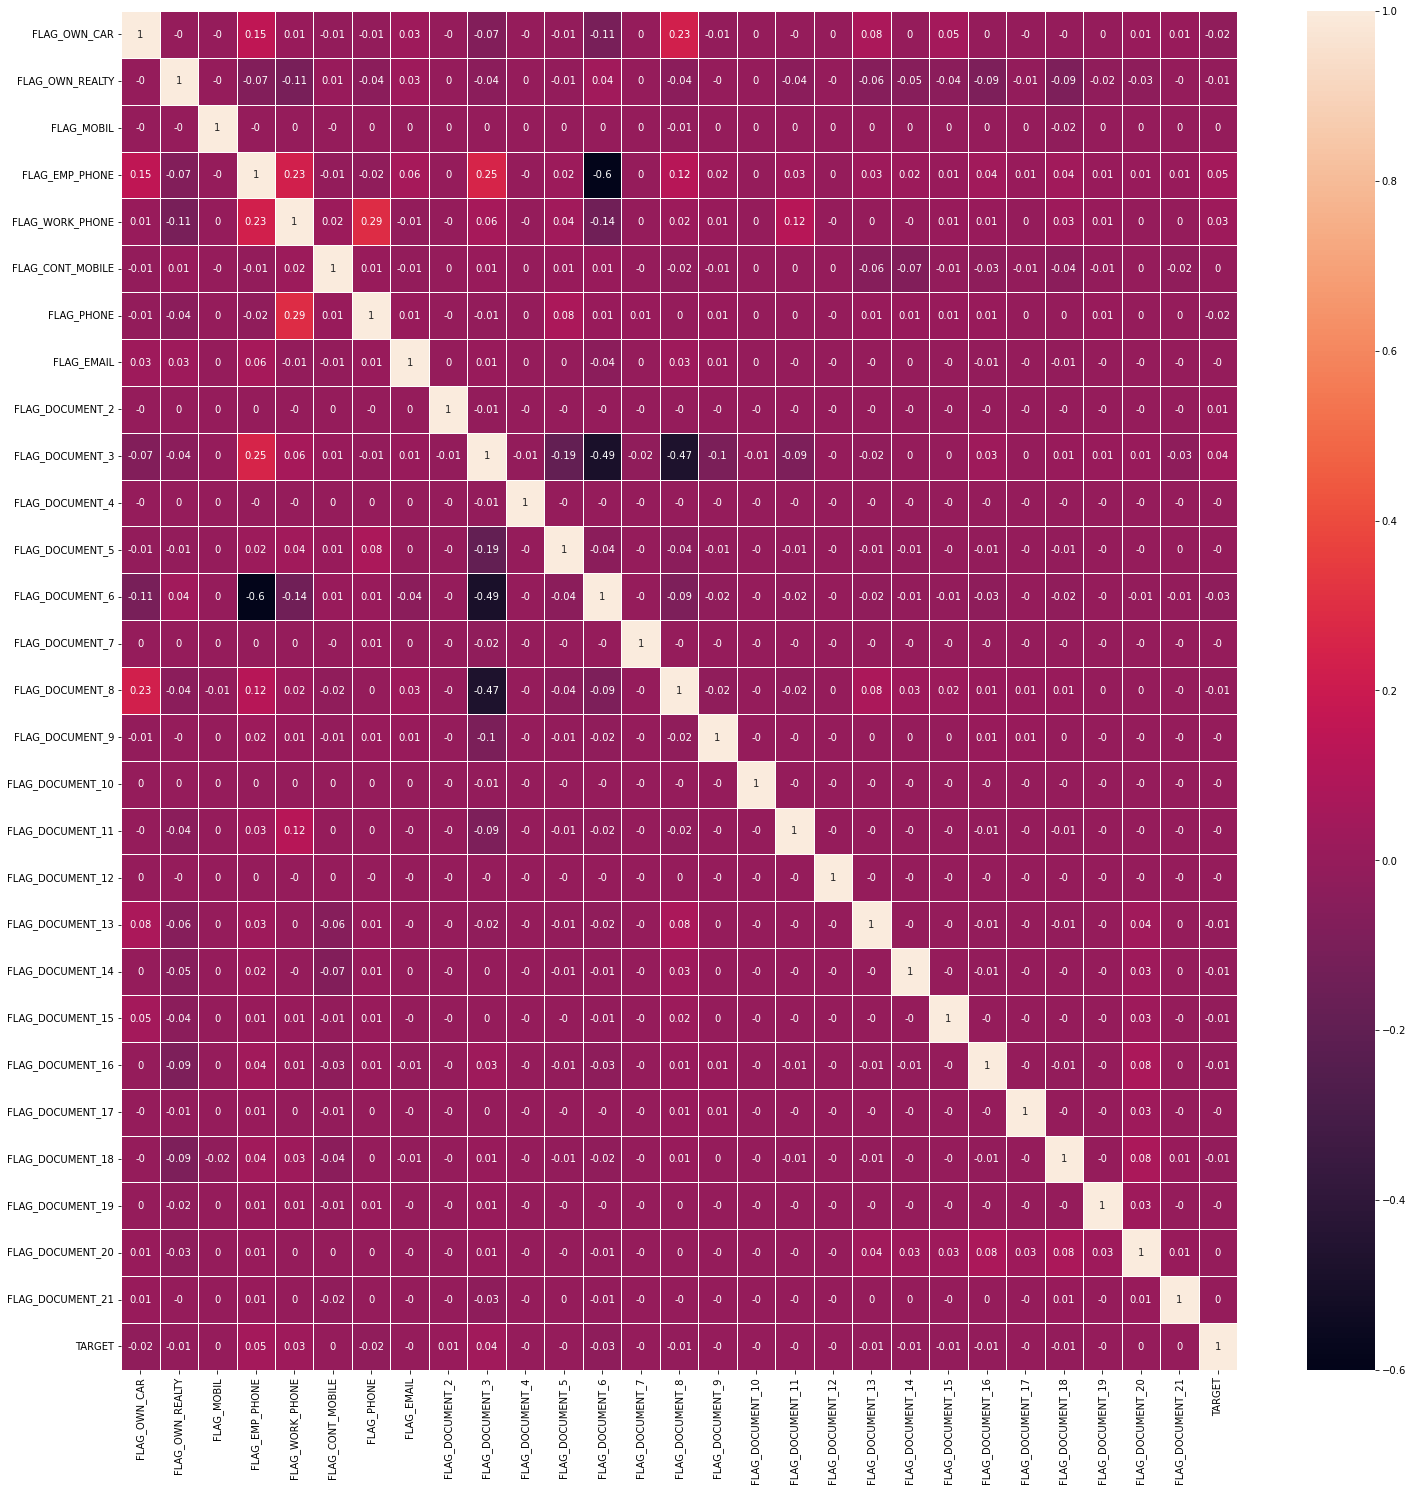

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(flag_corr, linewidths=0.5, annot=(True))

In [16]:
dropped_cols = dropped_cols.drop(flagged_col,axis=1)
dropped_cols.shape

(307511, 45)

In [17]:
dropped_cols.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
ext_corr = round(dropped_cols[['EXT_SOURCE_2','EXT_SOURCE_3', 'TARGET']].corr(),2)
ext_corr  

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.00,0.11,-0.16
EXT_SOURCE_3,0.11,1.00,-0.18
TARGET,-0.16,-0.18,1.00


In [19]:
dropped_cols = dropped_cols.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
dropped_cols.shape 

(307511, 43)

## Missing Value Imputations 

In [20]:
dropped_cols.isnull().sum().sort_values()/dropped_cols.shape[0]*100

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_RATING_CLIENT            0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
NAME_INCOME_TYPE

In [21]:
dropped_cols['CNT_FAM_MEMBERS'] = dropped_cols['CNT_FAM_MEMBERS'].fillna(dropped_cols['CNT_FAM_MEMBERS'].mode()[0])

In [22]:
dropped_cols['OCCUPATION_TYPE'] = dropped_cols['OCCUPATION_TYPE'].fillna(dropped_cols['OCCUPATION_TYPE'].mode()[0])

In [23]:
dropped_cols['NAME_TYPE_SUITE'] = dropped_cols['NAME_TYPE_SUITE'].fillna(dropped_cols['NAME_TYPE_SUITE'].mode()[0])

In [24]:
dropped_cols['AMT_ANNUITY'] = dropped_cols['AMT_ANNUITY'].fillna(dropped_cols['AMT_ANNUITY'].mean())

In [25]:
dropped_cols['OBS_30_CNT_SOCIAL_CIRCLE'] = dropped_cols['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(dropped_cols['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])

In [26]:
dropped_cols['DEF_30_CNT_SOCIAL_CIRCLE'] = dropped_cols['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(dropped_cols['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])

In [27]:
dropped_cols['OBS_60_CNT_SOCIAL_CIRCLE'] = dropped_cols['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(dropped_cols['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])

In [28]:
dropped_cols['DEF_60_CNT_SOCIAL_CIRCLE'] = dropped_cols['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(dropped_cols['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

In [29]:
dropped_cols['AMT_REQ_CREDIT_BUREAU_QRT'] = dropped_cols['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(dropped_cols['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])

In [30]:
dropped_cols['AMT_REQ_CREDIT_BUREAU_HOUR'] = dropped_cols['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(dropped_cols['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])

In [31]:
dropped_cols['AMT_REQ_CREDIT_BUREAU_DAY'] = dropped_cols['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(dropped_cols['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])

In [32]:
dropped_cols['AMT_REQ_CREDIT_BUREAU_WEEK'] = dropped_cols['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(dropped_cols['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])

In [33]:
dropped_cols['AMT_REQ_CREDIT_BUREAU_MON'] = dropped_cols['AMT_REQ_CREDIT_BUREAU_MON'].fillna(dropped_cols['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])

In [34]:
dropped_cols['AMT_REQ_CREDIT_BUREAU_YEAR'] = dropped_cols['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(dropped_cols['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])

In [35]:
dropped_cols['AMT_GOODS_PRICE'] = dropped_cols['AMT_GOODS_PRICE'].fillna(dropped_cols['AMT_GOODS_PRICE'].median())

In [36]:
dropped_cols['DAYS_LAST_PHONE_CHANGE'] = dropped_cols['DAYS_LAST_PHONE_CHANGE'].fillna(dropped_cols['DAYS_LAST_PHONE_CHANGE'].mode()[0])

In [37]:
dropped_cols.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dropped_cols.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13673
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
NAME_INCOME_TYPE                    8
WEEKDAY_APPR

In [39]:
neg_col = []
for i in dropped_cols.columns:
    if i.startswith("DAYS"):
        neg_col.append(i)
neg_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [40]:
for i in neg_col:
    dropped_cols[i] = abs(dropped_cols[i])

## Grouping Values

In [41]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','Above 900K']

dropped_cols['AMT_GOODS_PRICE_GROUPS'] = pd.cut(dropped_cols['AMT_GOODS_PRICE'],bins,labels=ranges)

In [42]:
dropped_cols.groupby(['AMT_GOODS_PRICE_GROUPS']).size()

AMT_GOODS_PRICE_GROUPS
0-100K         8709
100K-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [43]:
dropped_cols['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-50K','50K-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K','Above 400K']

dropped_cols['AMT_INCOME_TOTAL_GROUPS'] = pd.cut(dropped_cols['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [45]:
dropped_cols.groupby(['AMT_INCOME_TOTAL_GROUPS']).size()

AMT_INCOME_TOTAL_GROUPS
0-50K          4517
50K-100K      59181
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     8063
dtype: int64

In [46]:
dropped_cols['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [47]:
bins = [0,200000,400000,600000,800000,1000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-1M','Above 1M']

dropped_cols['AMT_CREDIT_GROUPS'] = pd.cut(dropped_cols['AMT_CREDIT'],bins,labels=ranges)

In [48]:
dropped_cols.groupby(['AMT_CREDIT_GROUPS']).size()

AMT_CREDIT_GROUPS
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-1M      30719
Above 1M     49985
dtype: int64

In [49]:
dropped_cols['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [50]:
dropped_cols['AMT_ANNUITY'].max()

258025.5

In [51]:
bins = [0,25000,50000,100000,150000,200000,258026]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

dropped_cols['AMT_ANNUITY_GROUPS'] = pd.cut(dropped_cols['AMT_ANNUITY'],bins,labels=ranges)

In [52]:
dropped_cols.groupby(['AMT_ANNUITY_GROUPS']).size()

AMT_ANNUITY_GROUPS
0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [53]:
dropped_cols['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [54]:
dropped_cols['DAYS_EMPLOYED'].max()

365243

In [55]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243]
ranges = ['0Y-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'Above 50Y']

dropped_cols['DAYS_EMPLOYED_GROUPS'] = pd.cut(dropped_cols['DAYS_EMPLOYED'],bins,labels=ranges)

In [56]:
dropped_cols.groupby(['DAYS_EMPLOYED_GROUPS']).size()

DAYS_EMPLOYED_GROUPS
0Y-5Y        136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
Above 50Y     55374
dtype: int64

In [57]:
dropped_cols['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.90    22181.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [58]:
dropped_cols['DAYS_BIRTH'].min()

7489

In [59]:
bins = [7300,10950,14600,18250,21900,25550]
ranges = ['20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

dropped_cols['DAYS_BIRTH_GROUPS'] = pd.cut(dropped_cols['DAYS_BIRTH'],bins,labels=ranges)

In [60]:
dropped_cols.groupby(['DAYS_BIRTH_GROUPS']).size()

DAYS_BIRTH_GROUPS
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

## EDA

In [61]:
dropped_cols.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [62]:
object_data_col = dropped_cols.select_dtypes(include=['object']).columns
object_data_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [63]:
dropped_cols.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

In [64]:
data_pct = dropped_cols[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean()
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [65]:
data_pct['Default %']  = data_pct['TARGET']*100
data_pct

,NAME_CONTRACT_TYPE,TARGET,Default %
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


In [66]:
tgt_pct = round((dropped_cols.groupby(['TARGET']).size()/dropped_cols.shape[0])*100,2)
tgt_pct

TARGET
0    91.93
1     8.07
dtype: float64

([<matplotlib.patches.Wedge at 0x1772370a7f0>,
 [Text(-1.0648373311559651, 0.2759011746561471, 'Non-Defaulters'),
  Text(1.06483734407183, -0.27590112480751394, 'Defaulters')],
 [Text(-0.5808203624487082, 0.15049154981244386, '91.9%'),
  Text(0.5808203694937254, -0.1504915226222803, '8.1%')])

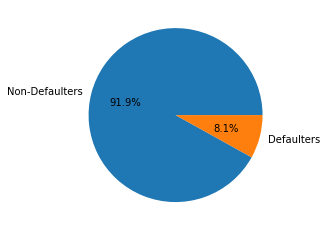

In [67]:
data = [tgt_pct[0],tgt_pct[1]]
keys = ['Non-Defaulters', 'Defaulters']
plt.pie(data, labels=keys, autopct='%1.1f%%')

#### - We can see in the above pie chart, in our data we have '91.9%' non-defaulters and '8.1%' defaulters 

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='Default %'>

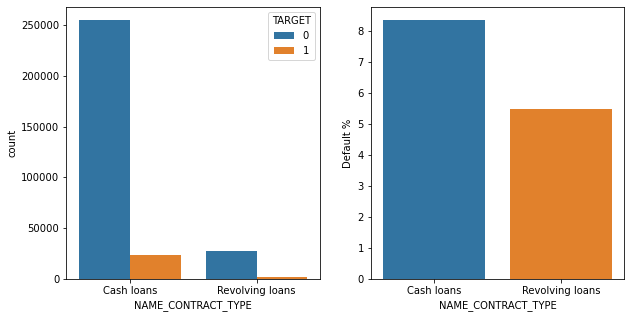

In [68]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=dropped_cols, x='NAME_CONTRACT_TYPE', hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE', y='Default %')

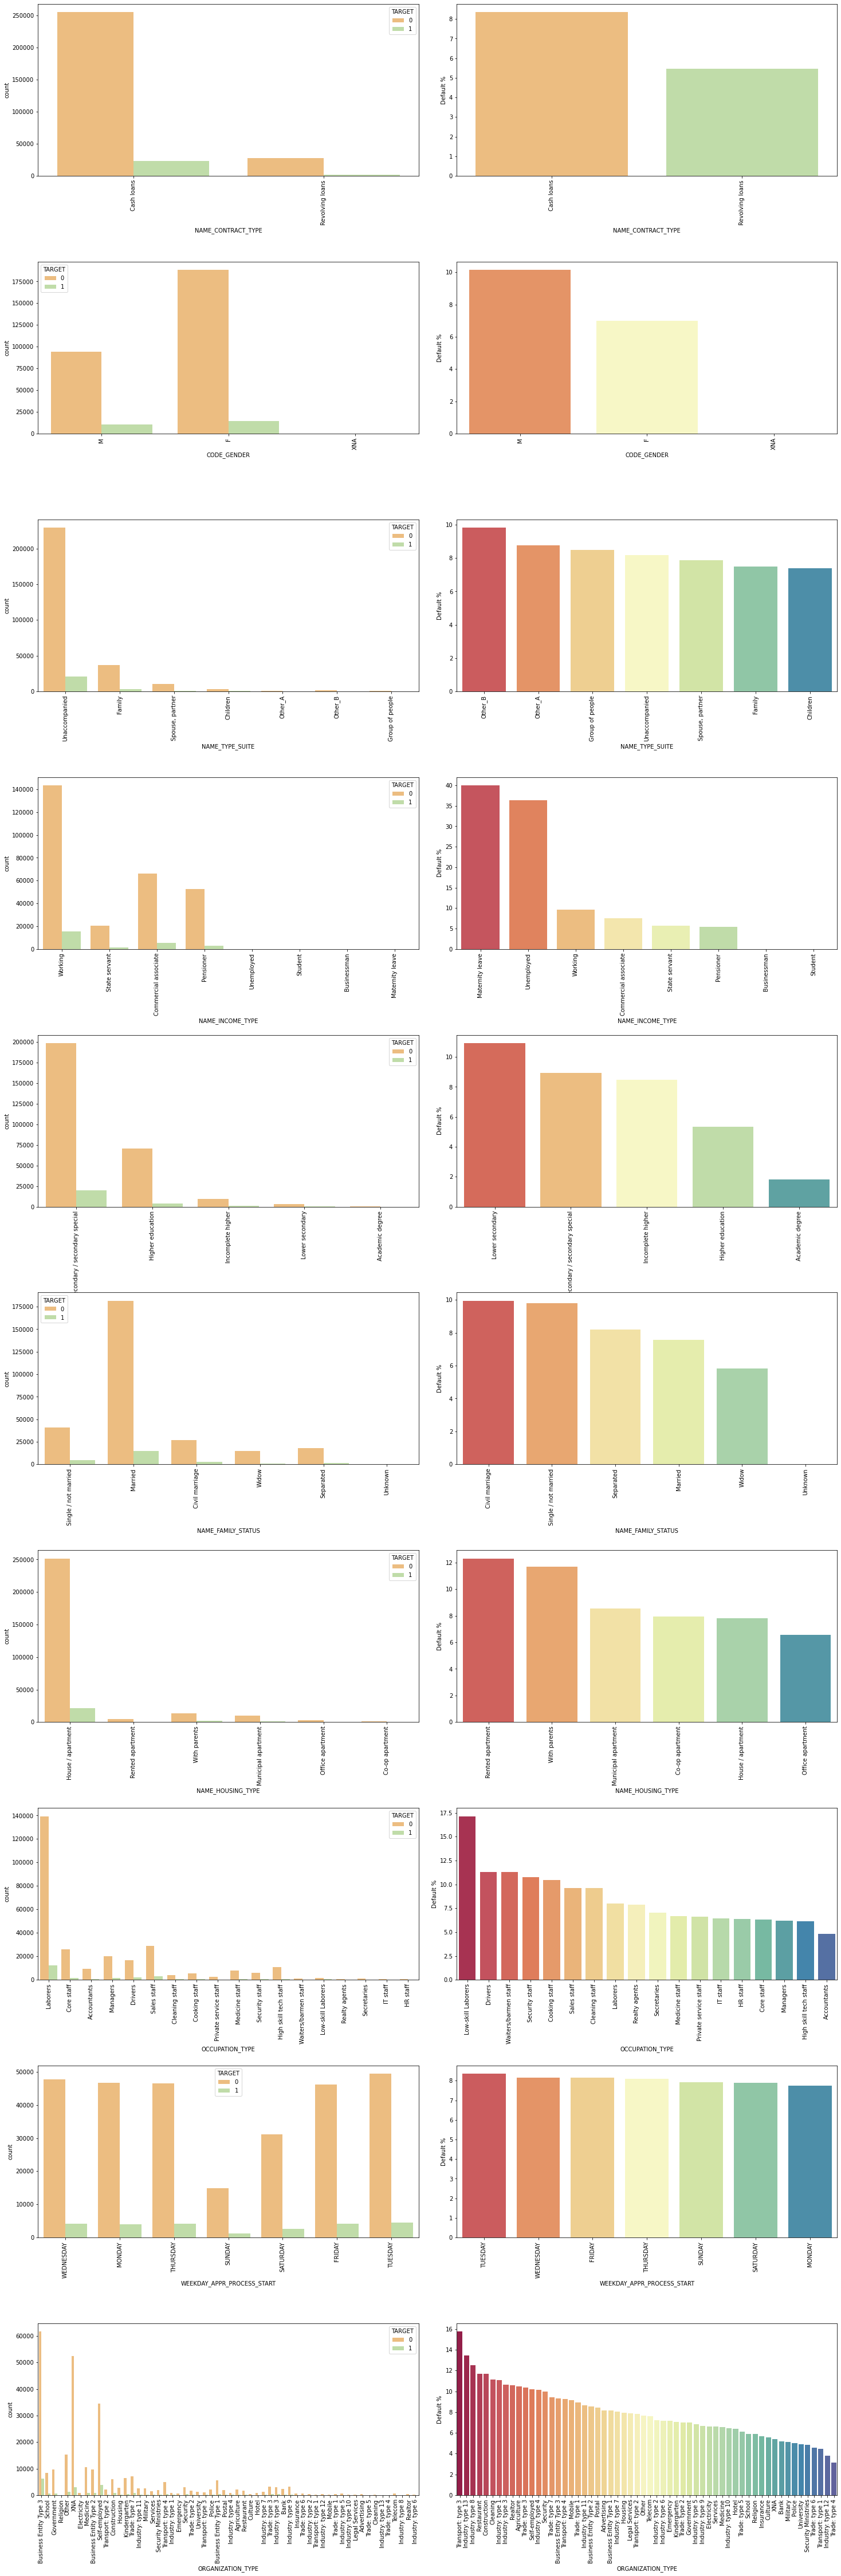

In [71]:
plt.figure(figsize=(25,80))

for i,j in enumerate(object_data_col):
    
    data_pct = dropped_cols[[j,'TARGET']].groupby([j], as_index=False).mean().sort_values(by='TARGET', ascending=False)
    data_pct['Default %']  = data_pct['TARGET']*100

    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    sns.countplot(data=dropped_cols, x=j, hue='TARGET',palette='Spectral')
    plt.xticks(rotation=90)
    
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=j, y='Default %',palette='Spectral')
    plt.xticks(rotation=90)

### Insights:

#### Contract Type:
- Customers who have taken revolving loans are more likely to default.

#### Gender:
- On having a look by Gender, it can be seen that out of both, females have a much lower default percentage than males.

#### Accompanied by:
- Out of all, unaccompanied people have taken the loan maximum number of times.

#### Income type:
- Most of the loan is taken by the working professionals and commercial and pensioners also comes out to have taken huge count of loans with a low default rate.

#### Education:
- People with lower secondary education are having a huge deafault percentage but they aren't taking much loans so there mst ot be any major impact.
- Majority of the loans are taken by the secondary special and higher education people, among which secondary special education people have a slightly high default rate.

#### Family status:
- Mostly loans are taken by the married people with a moderate default rate.
- With civil marriage people have the highest default rate.
- And widows having the least default rate.

#### Housing type:
- People having a house/apartment are on teh top to take the loan with average defaulters.
- On the other hand people who are renting an apartment holds the maximum defaulters.

#### Occupation type:
- labourers are taking huge part of loan count without having much defaulters in them whereas low-skilled labourers are having the mhighest default rate among all.

#### Organization type:
- Maximum loans are taken by people from business entity type 3.
- And highest deaulters are from transport type 3.

In [72]:
numeric_cols = dropped_cols.select_dtypes(include=['float64','int64']).columns
numeric_categorical_cols = dropped_cols.select_dtypes(include=['float64','int64','category']).columns

In [73]:
numeric_data = dropped_cols[numeric_cols]
defaulters = numeric_data[numeric_data['TARGET']==1]
non_defaulters = numeric_data[numeric_data['TARGET']==0]
non_defaulters.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
defaulters.head()

In [ ]:
defaulters_corr = defaulters.corr()
defaulters_corr.head()

In [ ]:
defaulters_corr_unstack = defaulters_corr.unstack().reset_index().rename(columns=({'level_0': 'column_1',
                                                                                  'level_1': 'column_2',
                                                                                  0: 'corr'}))
defaulters_corr_unstack.sort_values(by='corr',ascending=False)

In [ ]:
non_defaulters_corr = non_defaulters.corr()
non_defaulters_corr.head()

In [ ]:
non_defaulters_corr_unstack = defaulters_corr.unstack().reset_index().rename(columns=({'level_0': 'column_1','level_1': 'column_2',0: 'corr'}))
non_defaulters_corr_unstack
non_defaulters_corr_unstack.sort_values(by='corr',ascending=False)

In [ ]:
numeric_data.head()

## Univariate Analysis

In [ ]:
amount_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

In [ ]:
sns.kdeplot(data=numeric_data,x='AMT_CREDIT',hue='TARGET')

In [ ]:
plt.figure(figsize=(10,5))
for i,j in enumerate(amount_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=numeric_data,x=j,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

### Insights

- In maximum cases the loan amount credited was ranging between 0-1 M
- In accordance with the above observation the loan taken for the goods price were majority in between 0-1 M
- Most of the people were paying an annuity between 0-50000

## Bivariate Analysis

In [ ]:
numeric_data.head()

In [ ]:
sns.scatterplot(data=numeric_data,x = 'AMT_CREDIT',y = 'AMT_GOODS_PRICE',hue='TARGET')

In [ ]:
sns.scatterplot(data=numeric_data,x = 'AMT_CREDIT',y = 'AMT_INCOME_TOTAL',hue='TARGET')

In [ ]:
sns.scatterplot(data=numeric_data,x = 'AMT_CREDIT',y = 'CNT_CHILDREN',hue='TARGET')

### Insights

- By the above graph we can see a linear relationship between AMT_CREDIT and AMT_GOODS_PRICE
- 

In [ ]:
amount_data = numeric_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

In [ ]:
sns.pairplot(data=amount_data, hue='TARGET')

In [ ]:
dropped_cols.shape

In [ ]:
dropped_cols.to_csv(r'D:\Board Infinity\Projects\Final Projects BI\EDA on Financial services\Final_App_Data.csv')

In [ ]:
dropped_cols.nunique().sort_values(ascending=False)

In [ ]:
bivairate_data = numeric_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                               'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
                               'CNT_FAM_MEMBERS','CNT_CHILDREN','TARGET']]

In [ ]:
sns.pairplot(data=bivairate_data, hue='TARGET'  )